In [41]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [42]:
import json
with open('assets/legend/legend.json') as json_file:
    legend = json.load(json_file)

In [43]:
filepath=['assets/dataset/' + x for x in os.listdir('assets/dataset')]
labels=[x.split('_')[-1].split('.')[0] for x in filepath]
label_names=[legend[x] for x in labels]


In [44]:
filepath=pd.Series(filepath,name='Filepath').astype('str')
labels=pd.Series(label_names,name='Labels').astype('str')

In [45]:
table=pd.concat([filepath,labels],axis=1)
table.head()

,Filepath,Labels
0,assets/dataset/detective_71.jpg,Victreebel
1,assets/dataset/bc_5_41.jpg,Zubat
2,assets/dataset/cave_26.jpg,Raichu
3,assets/dataset/bc_2_131.jpg,Lapras
4,assets/dataset/gym_113.jpg,Chansey


# Display 15 pictures of the dataset

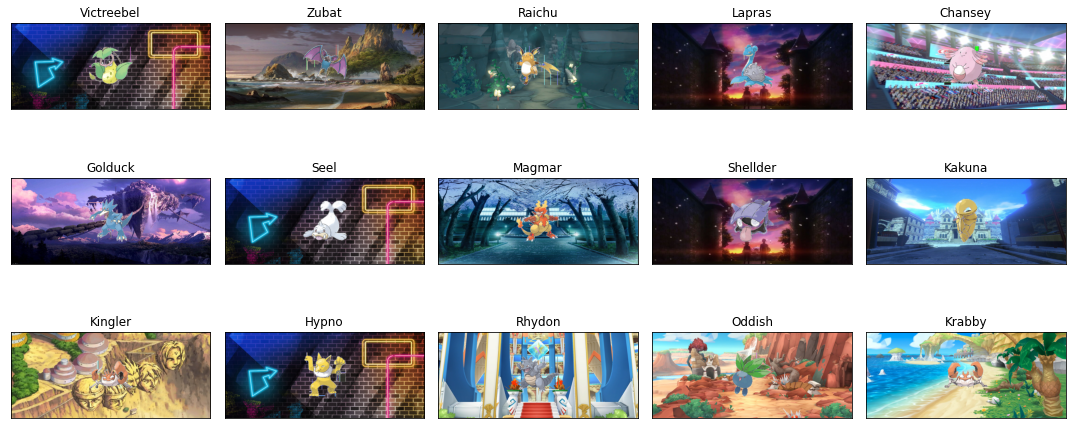

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(table.Filepath[i]))
    ax.set_title(table.Labels[i])
plt.tight_layout()
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(table,test_size=0.2)

In [19]:
test_df.head()

,Filepath,Labels
2265,assets/dataset/night_68.jpg,Machamp
226,assets/dataset/fan_5_138.jpg,Omanyte
4191,assets/dataset/fan_5_9.jpg,Blastoise
2512,assets/dataset/naruto_77.jpg,Ponyta
87,assets/dataset/arena_123.jpg,Scyther


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1.0/255)

train_data=train.flow_from_dataframe(train_df,x_col='Filepath',y_col='Labels',target_size=(1280,554),color_mode='rgb',class_mode='categorical',batch_size=32)
test_data=test.flow_from_dataframe(test_df,x_col='Filepath',y_col='Labels',target_size=(1280,554),color_mode='rgb',class_mode='categorical',batch_size=32)

Found 3382 validated image filenames belonging to 150 classes.
Found 846 validated image filenames belonging to 150 classes.


In [21]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.keras.activations.relu,input_shape=(1280,554,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(150,activation=tf.keras.activations.softmax)
])
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [22]:
history=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
106/106 [==============================] - 1008s 10s/step - loss: 5.1825 - accuracy: 0.2085 - val_loss: 4.1634 - val_accuracy: 0.5804
Epoch 2/5
106/106 [==============================] - 1030s 10s/step - loss: 0.6276 - accuracy: 0.9172 - val_loss: 0.0807 - val_accuracy: 0.9905
Epoch 3/5
106/106 [==============================] - 1064s 10s/step - loss: 0.0118 - accuracy: 0.9973 - val_loss: 0.0656 - val_accuracy: 0.9811
Epoch 4/5
106/106 [==============================] - 1059s 10s/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.1051 - val_accuracy: 0.9965
Epoch 5/5
106/106 [==============================] - 1094s 10s/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0223 - val_accuracy: 0.9976


<AxesSubplot:>

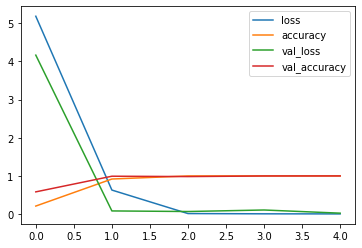

In [23]:
pd.DataFrame(history.history).plot()

In [27]:
def load_and_prep_image(filename):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = img/255
  return img

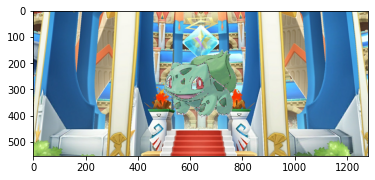

In [35]:
temp=load_and_prep_image('assets/dataset/arena_1.jpg')
plt.imshow(temp)

In [36]:
np.argmax(model.predict(tf.expand_dims(temp, axis=0)))

83

In [46]:
label_names[83]

'Exeggutor'

In [40]:
table.head()

,Filepath,Labels
0,assets/dataset/detective_71.jpg,Bulbasaur
1,assets/dataset/bc_5_41.jpg,Bulbasaur
2,assets/dataset/cave_26.jpg,Bulbasaur
3,assets/dataset/bc_2_131.jpg,Bulbasaur
4,assets/dataset/gym_113.jpg,Bulbasaur


In [24]:

def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);